In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv("train_AgeFilled.csv")
data = data.iloc[:,1:]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.260685,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.182531,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,-3.800000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Text(0,0.5,'Count')

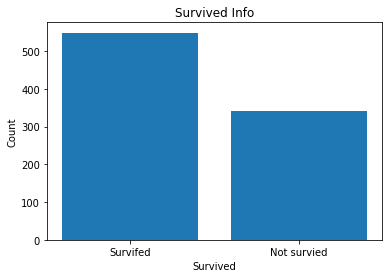

In [6]:
plt.figure(figsize=(6,4))

Survived_info = data["Survived"].value_counts()
plt.bar(("Survifed","Not survied"),(Survived_info[0],Survived_info[1]))
plt.title("Survived Info")
plt.xlabel("Survived")
plt.ylabel("Count")

### Class Info

Text(0,0.5,'Count')

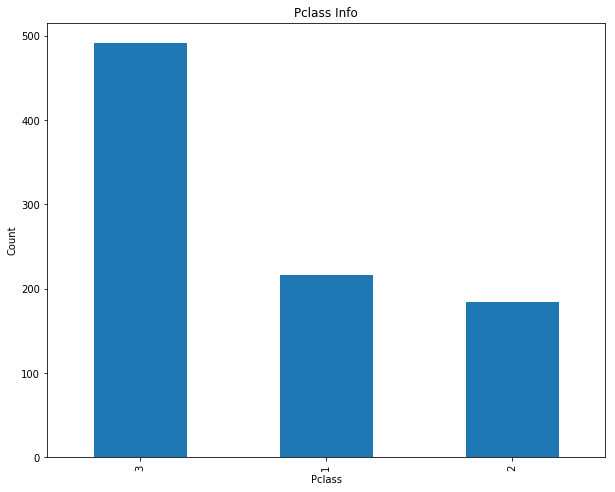

In [7]:
plt.figure(figsize=(10,8))

Age_info = data["Pclass"].value_counts()
Age_info.plot(kind="Bar")
plt.title("Pclass Info")
plt.xlabel("Pclass")
plt.ylabel("Count")

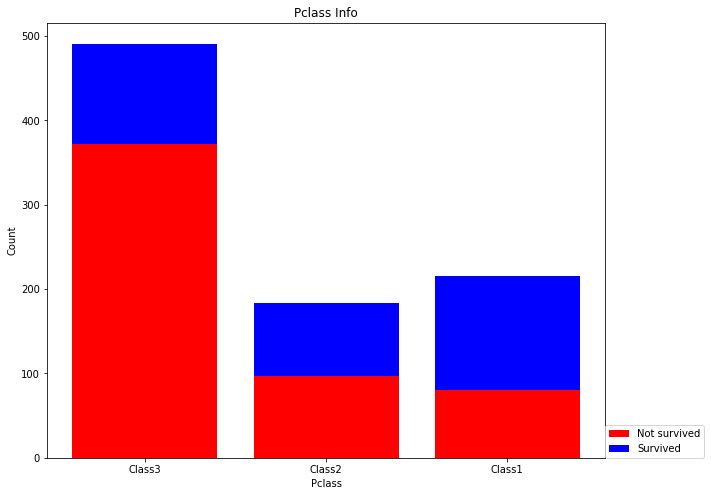

In [8]:
plt.figure(figsize=(10,8))

Pclass_info = data["Pclass"].value_counts()
Class3_live = data[ (data["Survived"]==1) & (data["Pclass"]==3)].shape[0]
Class3_die = data[ (data["Survived"]==0) & (data["Pclass"]==3)].shape[0]
Class2_live = data[ (data["Survived"]==1) & (data["Pclass"]==2)].shape[0]
Class2_die = data[ (data["Survived"]==0) & (data["Pclass"]==2)].shape[0]
Class1_live = data[ (data["Survived"]==1) & (data["Pclass"]==1)].shape[0]
Class1_die = data[ (data["Survived"]==0) & (data["Pclass"]==1)].shape[0]

live = np.array([Class3_live,Class2_live,Class1_live])
die = np.array([Class3_die,Class2_die,Class1_die])

plt.bar(["Class3","Class2","Class1"],die,color="red",label="Not survived")
plt.bar(["Class3","Class2","Class1"],live,bottom=die,color="blue",label="Survived")
plt.title("Pclass Info")
plt.xlim=500
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(loc=[1,0])

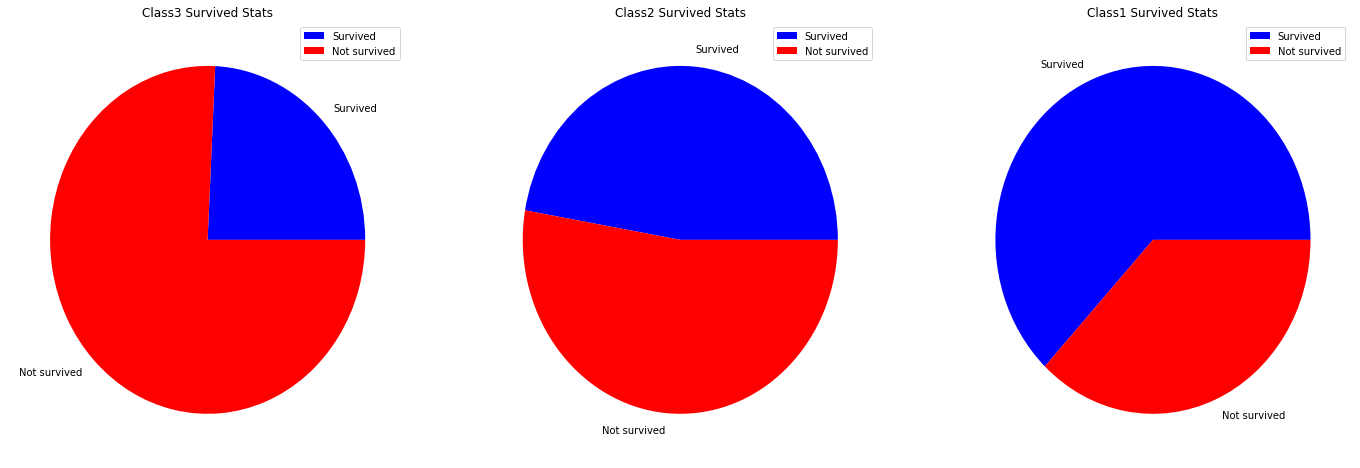

In [9]:
plt.figure(figsize=(24,8))

plt.subplot(1,3,1)
plt.pie([Class3_live,Class3_die],colors=('blue','red'),labels=("Survived","Not survived"))
plt.title("Class3 Survived Stats")
plt.legend(loc=0)

plt.subplot(1,3,2)
plt.pie([Class2_live,Class2_die],colors=('blue','red'),labels=("Survived","Not survived"))
plt.title("Class2 Survived Stats")
plt.legend(loc=0)

plt.subplot(1,3,3)
plt.pie([Class1_live,Class1_die],colors=('blue','red'),labels=("Survived","Not survived"))
plt.title("Class1 Survived Stats")
plt.legend(loc=0)

### Age Info

Text(0,0.5,'Count')

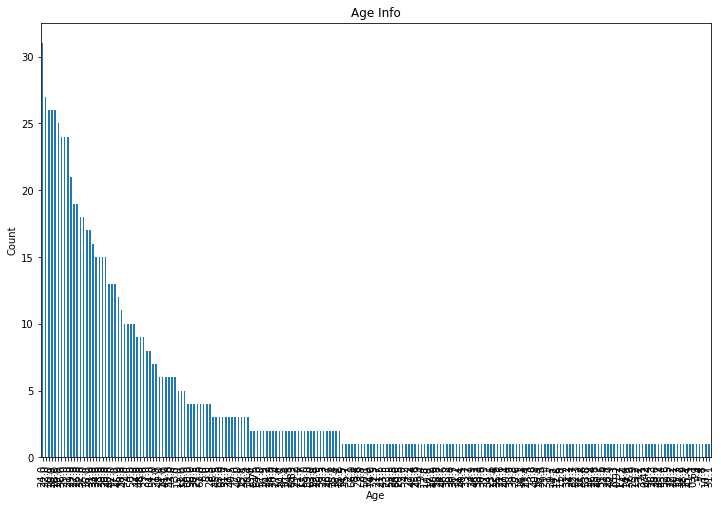

In [10]:
plt.figure(figsize=(12,8))

Age_info = data["Age"].value_counts()
Age_info.plot(kind="Bar")
plt.title("Age Info")
plt.xlabel("Age")
plt.ylabel("Count")

Text(0,0.5,'Survived rate')

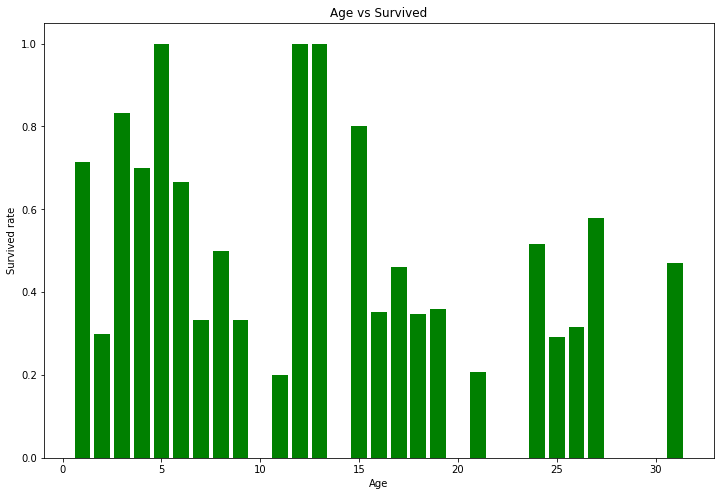

In [11]:
plt.figure(figsize=(12,8))

AgeVsSurvive = []
ages = np.unique(np.array(Age_info))
for age in ages:
        survived_rate = (data[ (data["Survived"]==1) & (data["Age"]==age)].shape[0])/(data[data["Age"]==age].shape[0])
        AgeVsSurvive.append(survived_rate)

plt.bar(ages,AgeVsSurvive,color="green")
plt.title("Age vs Survived")
plt.xlabel("Age")
plt.ylabel("Survived rate")

### Sex Info

Text(0,0.5,'Count')

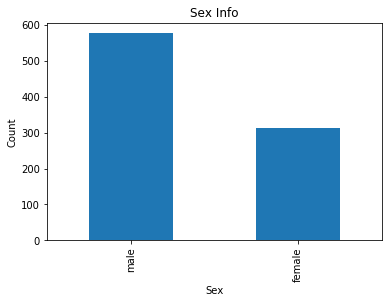

In [12]:
Sex_info = data["Sex"].value_counts()
Sex_info.plot("bar")
plt.title("Sex Info")
plt.xlabel("Sex")
plt.ylabel("Count")

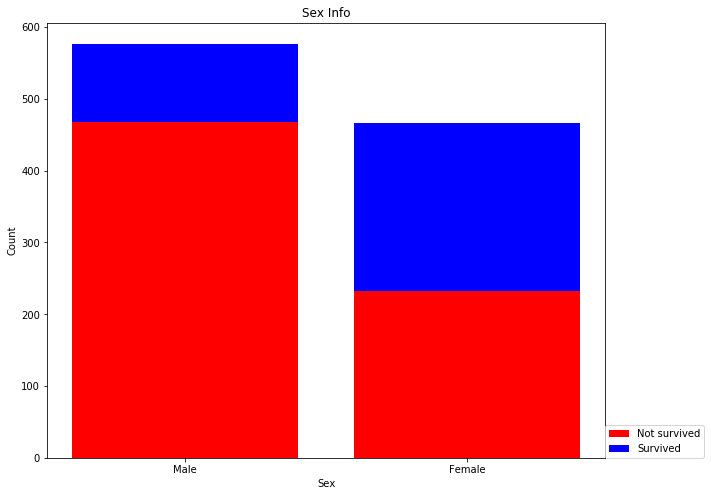

In [13]:
plt.figure(figsize=(10,8))

sex_info = data["Sex"].value_counts()
Male_live = data[ (data["Survived"]==1) & (data["Sex"]=="male")].shape[0]
Male_die = data[ (data["Survived"]==0) & (data["Sex"]=="male")].shape[0]
Female_live = data[ (data["Survived"]==1) & (data["Sex"]=="female")].shape[0]
Female_die = data[ (data["Survived"]==1) & (data["Sex"]=="female")].shape[0]

live = np.array([Male_live,Female_live])
die = np.array([Male_die,Female_die])

plt.bar(["Male","Female"],die,color="red",label="Not survived")
plt.bar(["Male","Female"],live,bottom=die,color="blue",label="Survived")
plt.title("Sex Info")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(loc=[1,0])

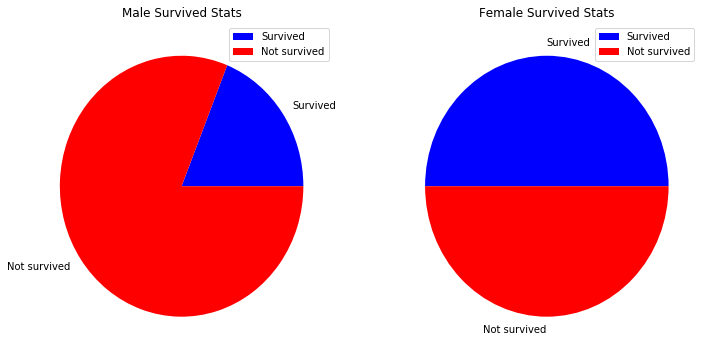

In [14]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.pie([Male_live,Male_die],colors=('blue','red'),labels=("Survived","Not survived"))
plt.title("Male Survived Stats")
plt.legend(loc=0)

plt.subplot(1,2,2)
plt.pie([Female_live,Female_die],colors=('blue','red'),labels=("Survived","Not survived"))
plt.title("Female Survived Stats")
plt.legend(loc=0)

### Sibling Info

Text(0,0.5,'Count')

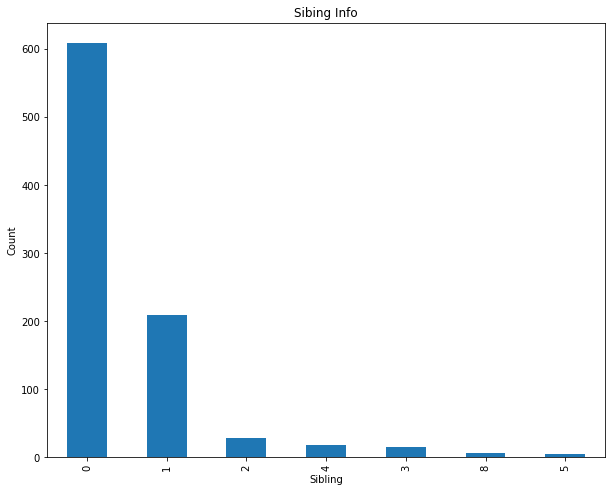

In [15]:
plt.figure(figsize=(10,8))

Sib_info = data["SibSp"].value_counts()
Sib_info.plot("bar")
plt.title("Sibing Info")
plt.xlabel("Sibling")
plt.ylabel("Count")

Text(0,0.5,'Survived rate')

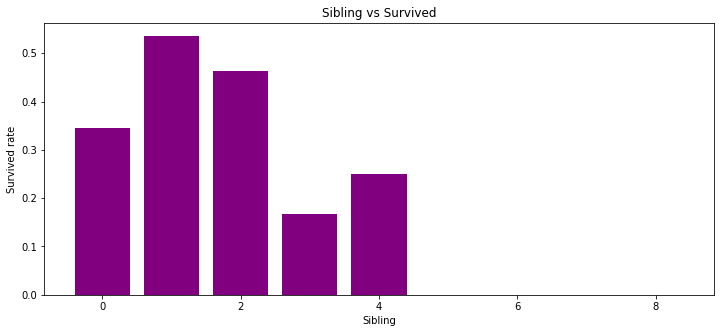

In [16]:
plt.figure(figsize=(12,5))

SibVsSurvive = []
sibs = np.unique(np.array(Sib_info.index))

for sib in sibs:
        survived_rate = (data[ (data["Survived"]==1) & (data["SibSp"]==sib)].shape[0])/(data[data["SibSp"]==sib].shape[0])
        SibVsSurvive.append(survived_rate)

plt.bar(Sib_info.index,SibVsSurvive,color="purple")
plt.title("Sibling vs Survived")
plt.xlabel("Sibling")
plt.ylabel("Survived rate")

### Parch Info

Text(0,0.5,'Count')

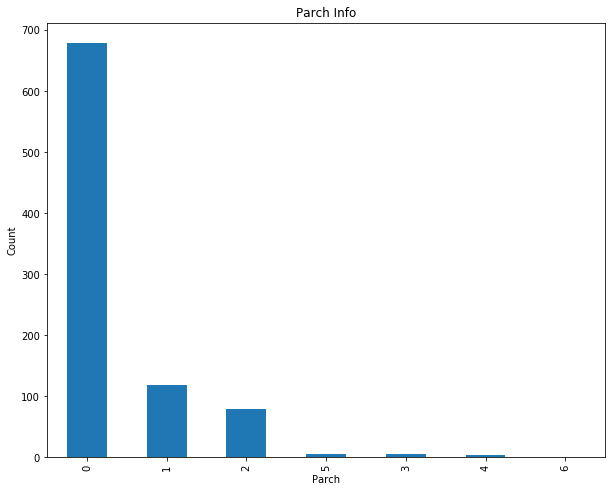

In [17]:
plt.figure(figsize=(10,8))

Parch_info = data["Parch"].value_counts()
Parch_info.plot("Bar")
plt.title("Parch Info")
plt.xlabel("Parch")
plt.ylabel("Count")

Text(0,0.5,'Survived rate')

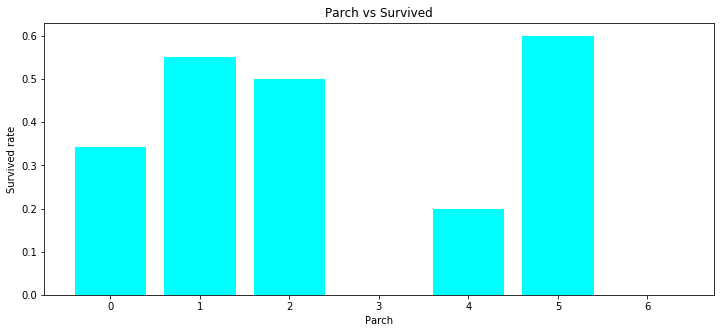

In [18]:
plt.figure(figsize=(12,5))

ParchVsSurvive = []
parches = np.unique(np.array(Parch_info.index))

for parch in parches:
        survived_rate = (data[ (data["Survived"]==1) & (data["Parch"]==parch)].shape[0])/(data[data["Parch"]==parch].shape[0])
        ParchVsSurvive.append(survived_rate)

plt.bar(Parch_info.index,ParchVsSurvive,color="cyan")
plt.title("Parch vs Survived")
plt.xlabel("Parch")
plt.ylabel("Survived rate")

### Fare Info

Text(0,0.5,'Count')

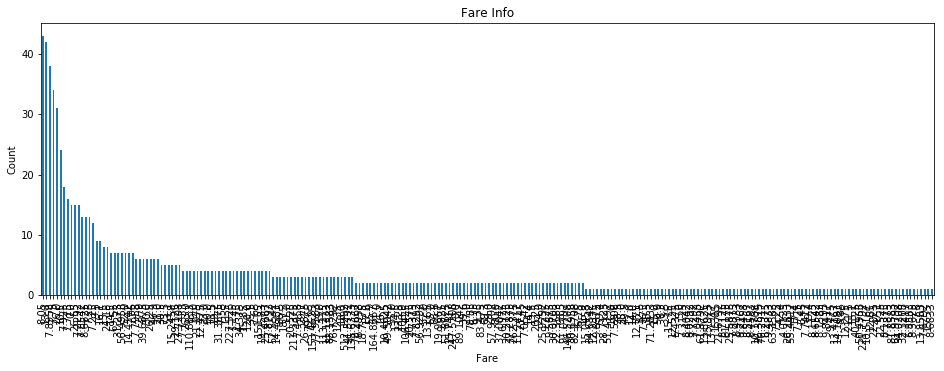

In [19]:
plt.figure(figsize=(16,5))

Fare_info = data["Fare"].value_counts()
Fare_info.plot("Bar")
plt.title("Fare Info")
plt.xlabel("Fare")
plt.ylabel("Count")

Text(0,0.5,'Survived rate')

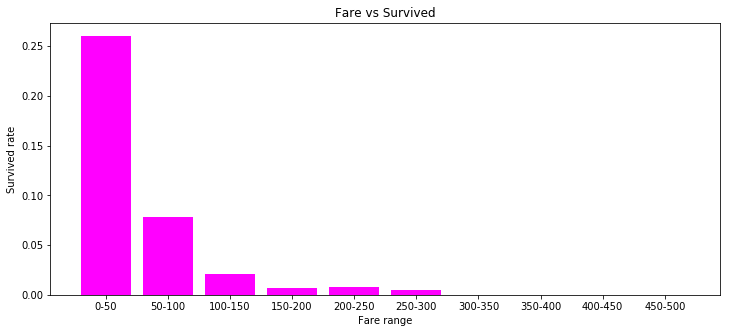

In [20]:
plt.figure(figsize=(12,5))

Fare_idx = ["0-50","50-100","100-150","150-200","200-250","250-300","300-350","350-400","400-450","450-500"]
Fare_live_cnt = [0,0,0,0,0,0,0,0,0,0]
Fare_die_cnt = [0,0,0,0,0,0,0,0,0,0]

def fare_cnt(row):
    fare = row["Fare"]
    survived = (row["Survived"] == 1)
    global Fare_live_cnt,Fare_die_cnt

    if (fare>0 and fare<50 and survived):
        Fare_live_cnt[0] += 1
    else:
        Fare_die_cnt[0] += 1
    if (fare>50 and fare<100 and survived):
        Fare_live_cnt[1] += 1
    else:
        Fare_die_cnt[1] += 1
    if (fare>100 and fare<150 and survived):
        Fare_live_cnt[2] += 1
    else:
        Fare_die_cnt[2] += 1
    if (fare>150 and fare<200 and survived):
        Fare_live_cnt[3] += 1
    else:
        Fare_die_cnt[3] += 1
    if (fare>200 and fare<250 and survived):
        Fare_live_cnt[4] += 1
    else:
        Fare_die_cnt[4] += 1
    if (fare>250 and fare<300 and survived):
        Fare_live_cnt[5] += 1
    else:
        Fare_die_cnt[5] += 1
    if (fare>300 and fare<350 and survived):
        Fare_live_cnt[6] += 1
    else:
        Fare_die_cnt[6] += 1
    if (fare>350 and fare<400 and survived):
        Fare_live_cnt[7] += 1
    else:
        Fare_die_cnt[7] += 1
    if (fare>400 and fare<450 and survived):
        Fare_live_cnt[8] += 1
    else:
        Fare_die_cnt[8] += 1
    if (fare>450 and fare<500 and survived):
        Fare_live_cnt[9] += 1
    else:
        Fare_die_cnt[9] += 1

fare_df = pd.DataFrame(data[["Fare","Survived"]])
fare_df.apply(fare_cnt,axis=1)

Fare_cnt = np.array(Fare_live_cnt)+np.array(Fare_die_cnt)
Fare_live_cnt = np.array(Fare_live_cnt)
Fare_survived_rate = Fare_live_cnt/Fare_cnt

plt.bar(Fare_idx,Fare_survived_rate,color="magenta")
plt.title("Fare vs Survived")
plt.xlabel("Fare range")
plt.ylabel("Survived rate")

### Embarked Info

Text(0,0.5,'Count')

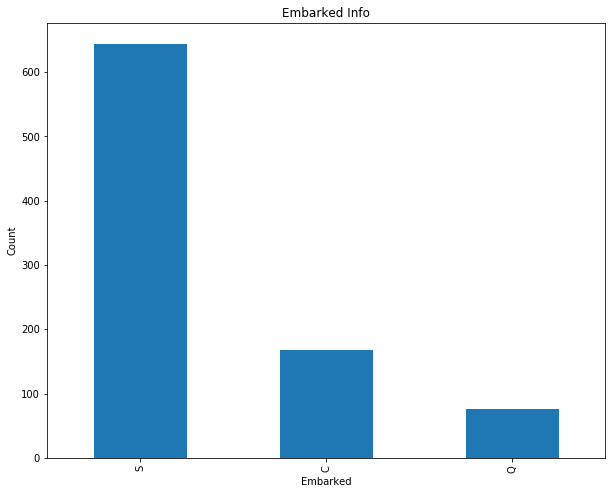

In [21]:
plt.figure(figsize=(10,8))

Embarked_info = data["Embarked"].value_counts()
Embarked_info.plot("Bar")
plt.title("Embarked Info")
plt.xlabel("Embarked")
plt.ylabel("Count")

Text(0,0.5,'Survived rate')

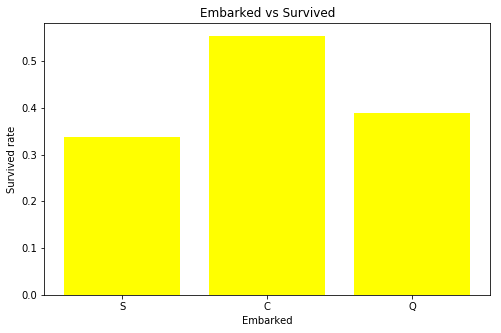

In [22]:
plt.figure(figsize=(8,5))

EmVsSurvive = []
ems = Embarked_info.index

for em in ems:
        survived_rate = (data[ (data["Survived"]==1) & (data["Embarked"]==em)].shape[0])/(data[data["Embarked"]==em].shape[0])
        EmVsSurvive.append(survived_rate)

plt.bar(Embarked_info.index,EmVsSurvive,color="yellow")
plt.title("Embarked vs Survived")
plt.xlabel("Embarked")
plt.ylabel("Survived rate")